In [1]:
import src.util as utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math

In [2]:
konfig = utils.load_params(str(utils.get_dir()) + utils.get_params())

In [3]:
def load_train_clean(params: dict):
    # Load train set
    X_train = utils.pickle_load(params["train_clean_set_path"][0])
    y_train = utils.pickle_load(params["train_clean_set_path"][1])

    return X_train, y_train

def load_test(params: dict):
    # Load tets set
    X_test = utils.pickle_load(params["test_set_path"][0])
    y_test = utils.pickle_load(params["test_set_path"][1])

    return X_test, y_test

In [122]:
X_train, y_train = load_train_clean(konfig)
X_test, y_test = load_test(konfig)

In [61]:
def get_baseline_pred():
    return y_train.mean()

In [62]:
def get_baseline_rsme():
    baseline_mse = mean_squared_error(y_train, np.ones(len(y_train)) * np.float64(get_baseline_pred()))
    #print(get_baseline_pred())
    #print(math.sqrt(baseline_mse))
    return math.sqrt(baseline_mse)

In [13]:
#xz = get_baseline_rsme()

HARGA    7.456599e+09
dtype: float64
7068707503.465105


In [123]:
lr = LinearRegression()

In [64]:
def get_scores_rsme():
    scores_rsme = cross_val_score(estimator = lr,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_root_mean_squared_error")
    return scores_rsme

In [124]:
scores = get_scores_rsme()
scores

array([-3.99882273e+09, -3.60468865e+09, -3.60428506e+09, -3.40977583e+09,
       -3.39740081e+09])

In [125]:
lr_cv_scores = - np.mean(get_scores_rsme())
lr_cv_scores

3602994617.528216

In [126]:
y_train.shape

(704, 1)

In [127]:
# Lakukan Fitting Data
lr.fit(X = X_train, y = y_train)

LinearRegression()

In [128]:
# Buat prediksi rsme
y_pred = lr.predict(X_train)

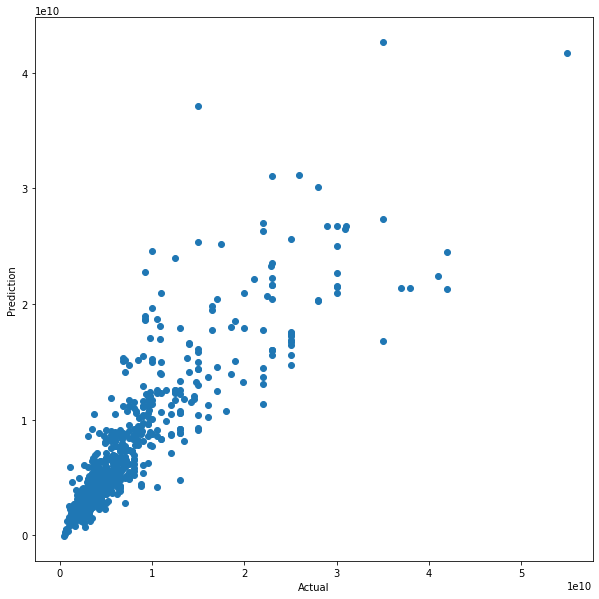

In [39]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(y_train, y_pred)
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")

plt.show()

In [129]:
prediction_train = math.sqrt(mean_squared_error(y_pred, y_train))
print(prediction_train)

3564297944.2741485


In [130]:
baseline_mse = get_baseline_pred()
baseline_pred

HARGA    7.456599e+09
dtype: float64

In [131]:
comparison_rmse = 100*(get_baseline_rsme() - prediction_train) / get_baseline_rsme()
print(f"RMSE turun {comparison_rmse:.2f} %")

RMSE turun 49.98 %


In [132]:
lr.coef_

array([[ 1.44151388e+07,  2.18051975e+07, -4.62321802e+08,
         1.68448711e+08,  2.94588516e+08]])

In [133]:
y_test_pred = lr.predict(X_test)

In [134]:
prediction_test = math.sqrt(mean_squared_error(y_test_pred, y_test))
print(prediction_test)

2902605232.1855426


In [135]:
comparison_rmse_test = 100*(get_baseline_rsme() - prediction_test) / get_baseline_rsme()
print(f"RMSE turun {comparison_rmse_test:.2f} %")

RMSE turun 59.26 %
